## 1.Creating Income Categories

In [1]:
import pandas as pd                     # Import Pandas for data handling
import numpy as np                      # Import NumPy for numerical operations

# Load the dataset
data = pd.read_csv("housing.csv")       # Read CSV file and store it as a DataFrame

# Create income categories
data["income_cat"] = pd.cut(            # Create a new column by binning median_income
    data["median_income"],              # Column to be divided into categories
    bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],# Define income ranges (bins) #np.inf means infinite value
    labels=[1, 2, 3, 4, 5]               # Assign category labels to each range
)


## 2.Stratified Shuffle Split in Scikit-Learn

##### Scikit-learn provides a built-in way to perform stratified sampling using  StratifiedShuffleSplit .

###### Here’s how you can use it:

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit   # Import class for stratified splitting

# Assume income_cat is already created from median_income
split = StratifiedShuffleSplit(
    n_splits=1,          # Number of train-test splits to generate
    test_size=0.2,       # 20% of data will be used as test set
    random_state=42      # Fix randomness for reproducibility
)

for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]   # Select training data using stratified indices
    strat_test_set = data.loc[test_index]     # Select test data using stratified indices


## 3. Lets remove income category coloumn

In [3]:
# Code to remove income category coloumn
for sett in (strat_train_set , strat_test_set):
    sett.drop("income_cat",axis=1,inplace=True)

In [4]:
strat_train_set
df=strat_train_set.copy() #training dataset ki copy bana lo aur ousko df me save krlo ab hum aone sare kaam df me krege joki humra training dataset h
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,72100,INLAND
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,279600,NEAR OCEAN
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,82700,INLAND
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,112500,NEAR OCEAN
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,238300,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14,6665,1231.0,2026,1001,5.0900,268500,<1H OCEAN
12661,-121.42,38.51,15,7901,1422.0,4769,1418,2.8139,90400,INLAND
19263,-122.72,38.44,48,707,166.0,458,172,3.1797,140400,<1H OCEAN
19140,-122.70,38.31,14,3155,580.0,1208,501,4.1964,258100,<1H OCEAN


In [5]:
strat_test_set # now do not touch this data set we will use this data set only while testing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29,6447,1012.0,2184,960,8.2816,500001,<1H OCEAN
17352,-120.42,34.89,24,2020,307.0,855,283,5.0099,162500,<1H OCEAN
3505,-118.45,34.25,36,1453,270.0,808,275,4.3839,204600,<1H OCEAN
7777,-118.10,33.91,35,1653,325.0,1072,301,3.2708,159700,<1H OCEAN
14155,-117.07,32.77,38,3779,614.0,1495,614,4.3529,184000,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19,2248,427.0,1207,368,2.8170,110000,<1H OCEAN
7275,-118.24,33.99,33,885,294.0,1270,282,2.1615,118800,<1H OCEAN
17223,-119.72,34.44,43,1781,342.0,663,358,4.7000,293800,<1H OCEAN
10786,-117.91,33.63,30,2071,412.0,1081,412,4.9125,335700,<1H OCEAN


# Visualizing the DATA

Before handling missing values or training models, it’s important to visualize the
data to uncover patterns, relationships, and potential issues

### 1.Geographical Scatter Plot
Visualize the geographical distribution of the data:

- alpha=0.2 makes overlapping points more visible.
- This helps reveal data clusters and high-density areas like coastal regions.

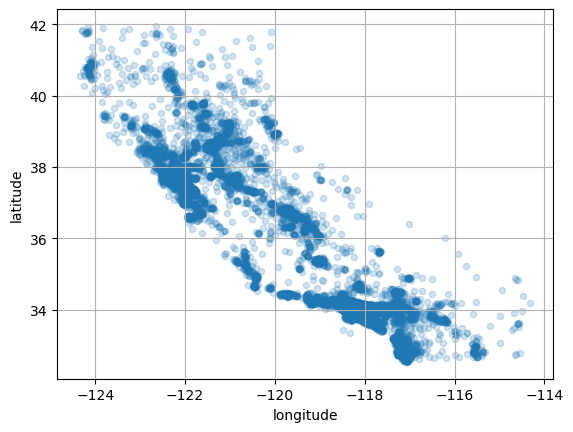

In [6]:
import matplotlib.pyplot as plt
df.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

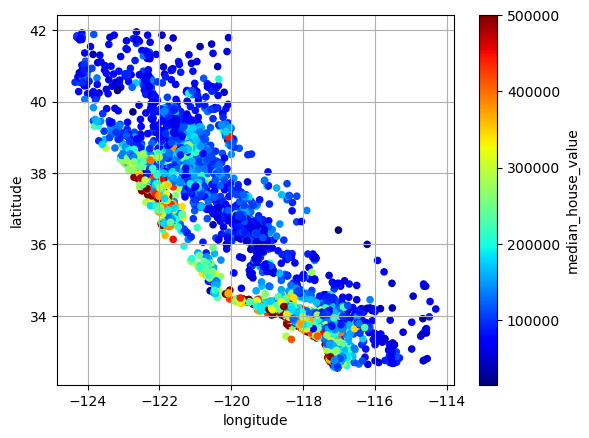

In [7]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True,cmap="jet",c="median_house_value")

## 2.Correlation Matrix

To understand relationships between numerical features, compute the <b>correlation matrix:

In [8]:
df.drop(labels="ocean_proximity" ,inplace= True , axis=1)
corr_matrix=df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


#### Check how strongly each attribute correlates with the target

In [9]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

- This helps identify useful predictors. For example, median_income usually shows a
strong positive correlation with house prices.

## 3.Scatter Matrix

Plot selected features to see pairwise relationships:
- This gives an overview of which features are linearly related and may be good
predictors

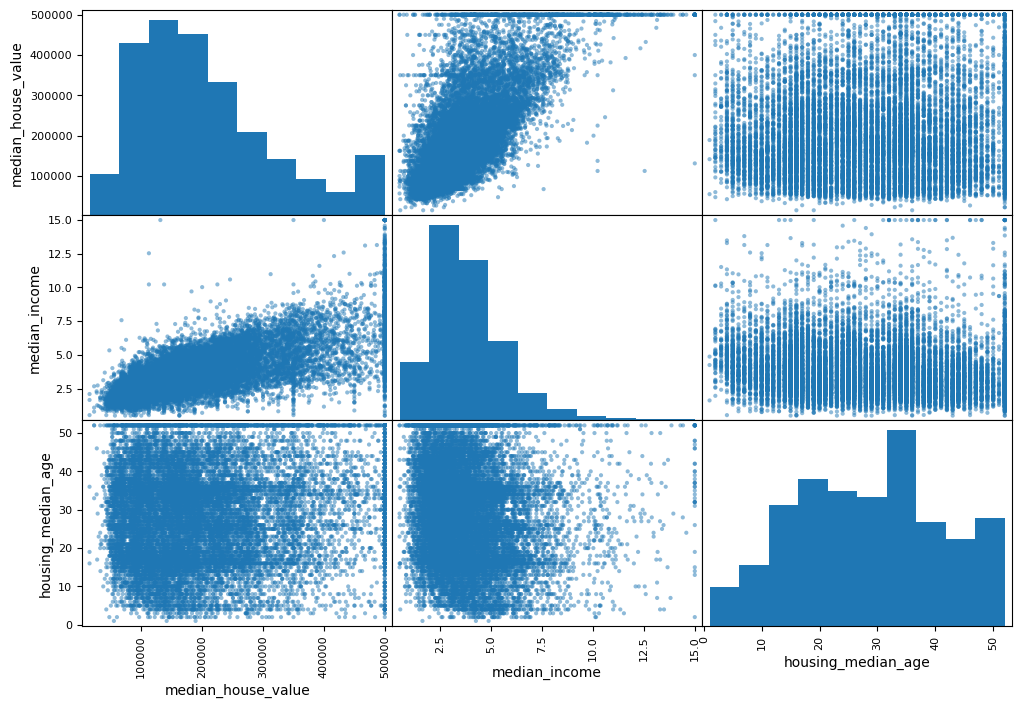

In [10]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8)) 
plt.show()

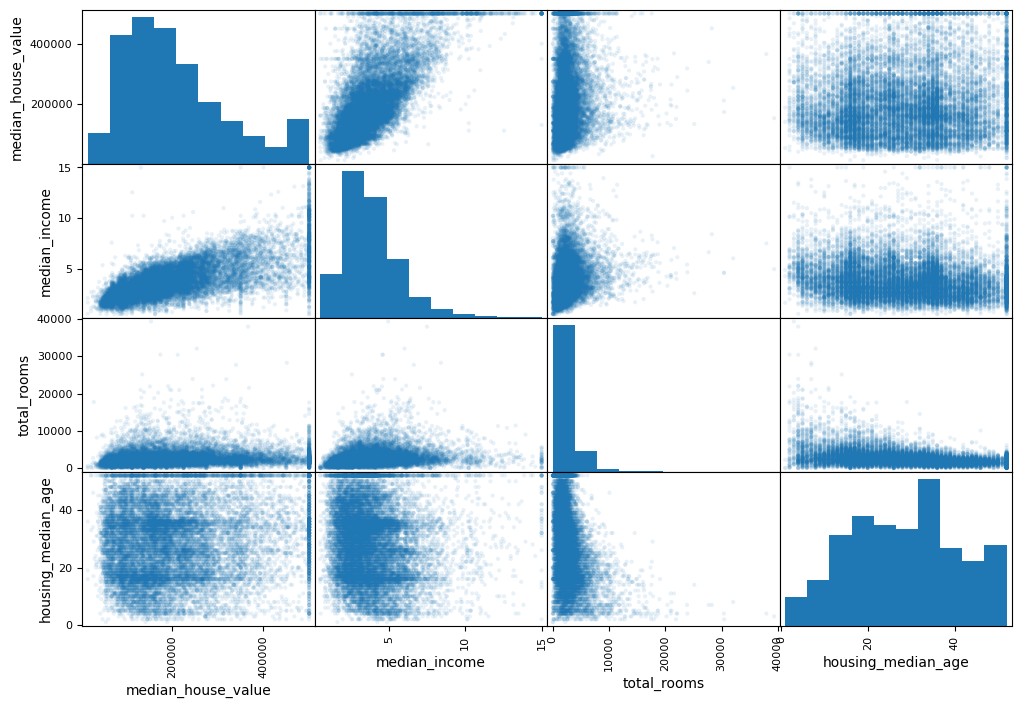

In [11]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8), alpha=0.1)
plt.show()

### 4.Focused Income vs Price Plot

Plot median_income vs median_house_value directly:

<Axes: xlabel='median_income', ylabel='median_house_value'>

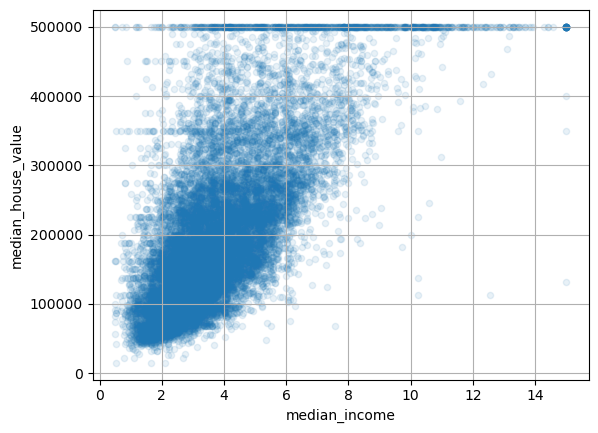

In [12]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1,grid=True)